Border Crossing Entry Data

Objectives

1-Data Exploration and Cleaning

=== Shape of the dataset ===
(399406, 10)

=== Data Types and Non-Null Counts ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399406 entries, 0 to 399405
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  399406 non-null  object 
 1   State      399406 non-null  object 
 2   Port Code  399406 non-null  int64  
 3   Border     399406 non-null  object 
 4   Date       399406 non-null  object 
 5   Measure    399406 non-null  object 
 6   Value      399406 non-null  int64  
 7   Latitude   399406 non-null  float64
 8   Longitude  399406 non-null  float64
 9   Point      399406 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.5+ MB
None

=== Missing Values ===
Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     0
Longitude    0
Point        0
dtype: int64

=== Duplicated Rows ===
10

=== Basic Statistical Summary =

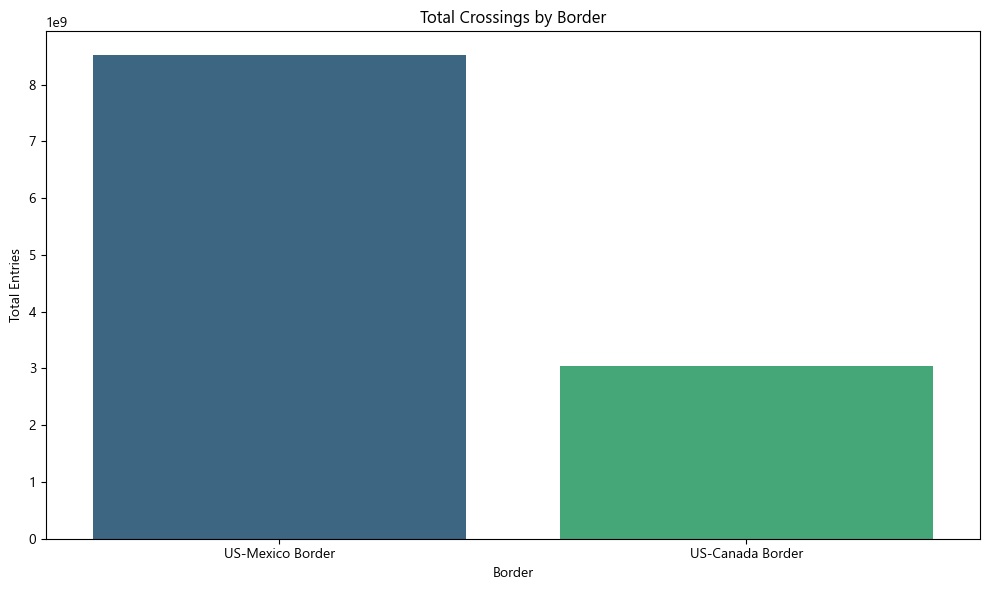

In [8]:
# 📦 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Segoe UI Emoji'
# 🗂️ Step 2: Load the dataset
file_path = "C:/Users/joypy/Downloads/Border_Crossing_Entry_Data2.csv"
df = pd.read_csv(file_path)

# 🔍 Step 3: Initial Exploration
print("=== Shape of the dataset ===")
print(df.shape)

print("\n=== Data Types and Non-Null Counts ===")
print(df.info())

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Duplicated Rows ===")
print(df.duplicated().sum())

print("\n=== Basic Statistical Summary ===")
print(df.describe(include='all'))

print("\n=== Unique Values per Column ===")
print(df.nunique())

#  Step 4: Data Cleaning
df = df.drop_duplicates()  # Remove duplicates
df['Date'] = pd.to_datetime(df['Date'],format='%b %Y', errors='coerce')  # Convert date
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # Standardize column names
df.fillna({'value': 0}, inplace=True)  # Fill missing numerical values with 0

#  Optional: Drop rows where essential columns are still missing
df = df.dropna(subset=['date', 'port_name', 'border'])

# 🧠 Step5: Data Analysis Prep
# Example: Total entries by border
border_totals = df.groupby('border')['value'].sum().sort_values(ascending=False)
print("\n=== Total Entries by Border ===")
print(border_totals)

#  Step 6: Visualization Example
plt.figure(figsize=(10, 6))
sns.barplot(x=border_totals.index, y=border_totals.values,hue=border_totals.index, palette='viridis')
plt.title('Total Crossings by Border')
plt.xlabel('Border')
plt.ylabel('Total Entries')
plt.tight_layout()
plt.show()

# 🗂️ Step 7: Save Cleaned Data (Optional)
df.to_csv("cleaned_border_data.csv", index=False)


2-Describe Analytics

=== Summary of Numeric Columns ===
           port_code                           date         value  \
count  399396.000000                         399396  3.993960e+05   
mean     2445.983097  2009-03-28 12:38:14.576810752  2.894334e+04   
min       101.000000            1996-01-01 00:00:00  0.000000e+00   
25%      2304.000000            2002-09-01 00:00:00  0.000000e+00   
50%      3012.000000            2008-12-01 00:00:00  1.470000e+02   
75%      3401.000000            2015-04-01 00:00:00  3.028250e+03   
max      3814.000000            2025-02-01 00:00:00  4.447374e+06   
std      1204.285039                            NaN  1.495005e+05   

            latitude      longitude  
count  399396.000000  399396.000000  
mean       43.967603     -99.719788  
min        25.952000    -141.001000  
25%        42.999000    -114.728000  
50%        48.122000    -101.628000  
75%        49.000000     -84.361000  
max        62.615000     -66.980000  
std         8.152653      18.258674  



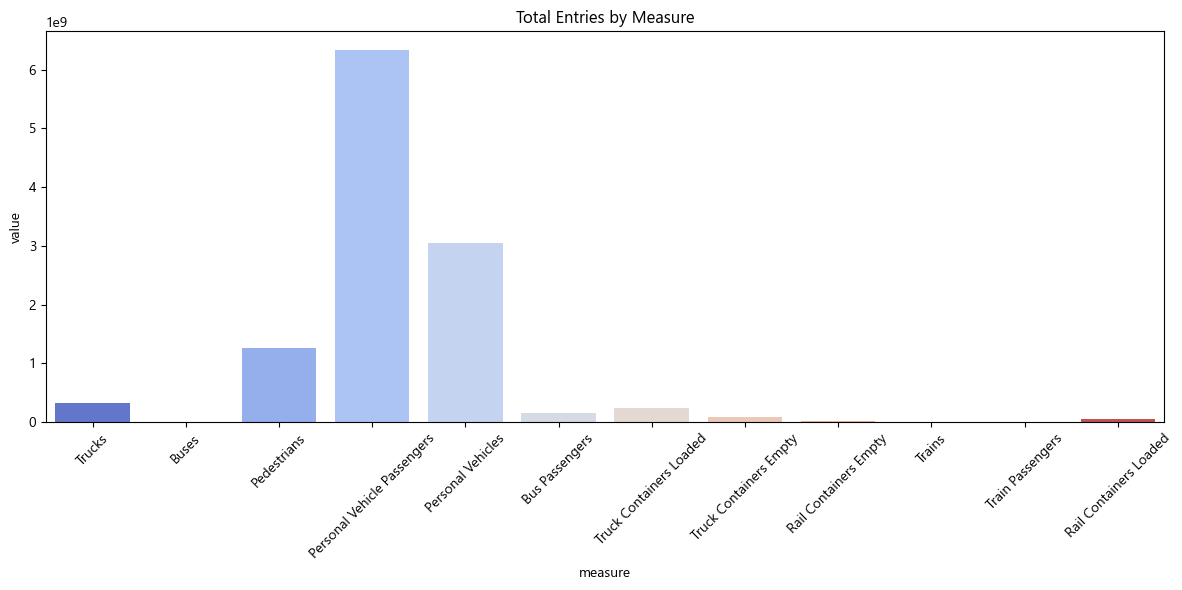

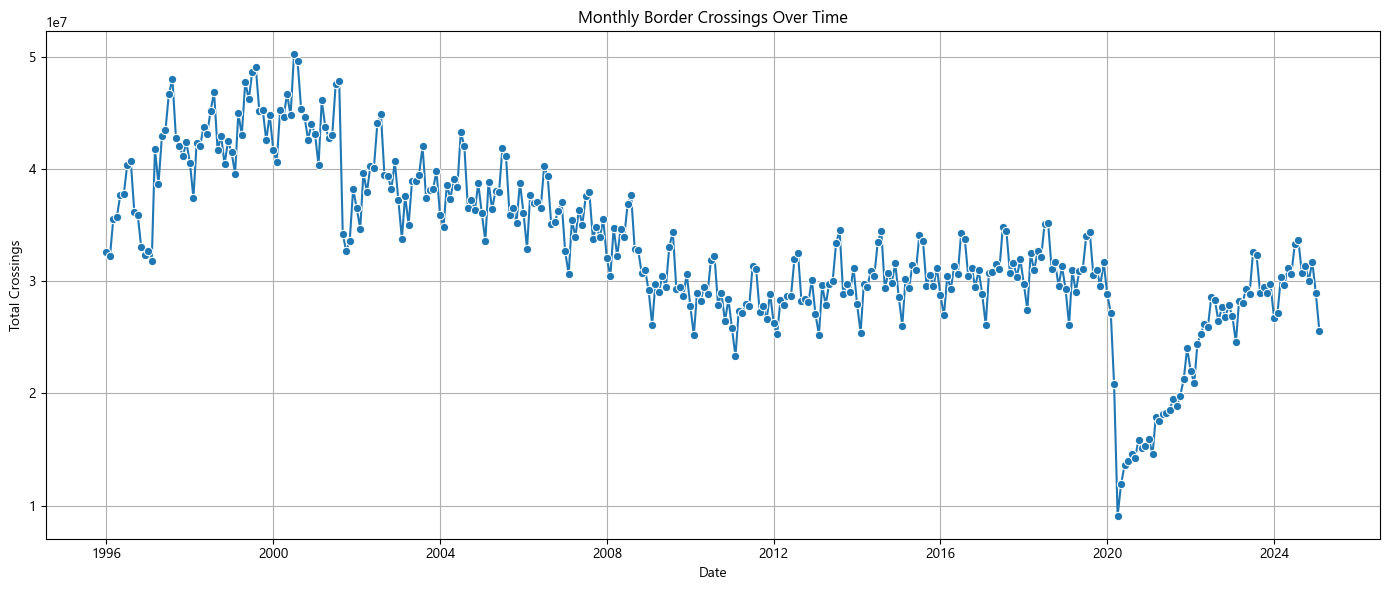

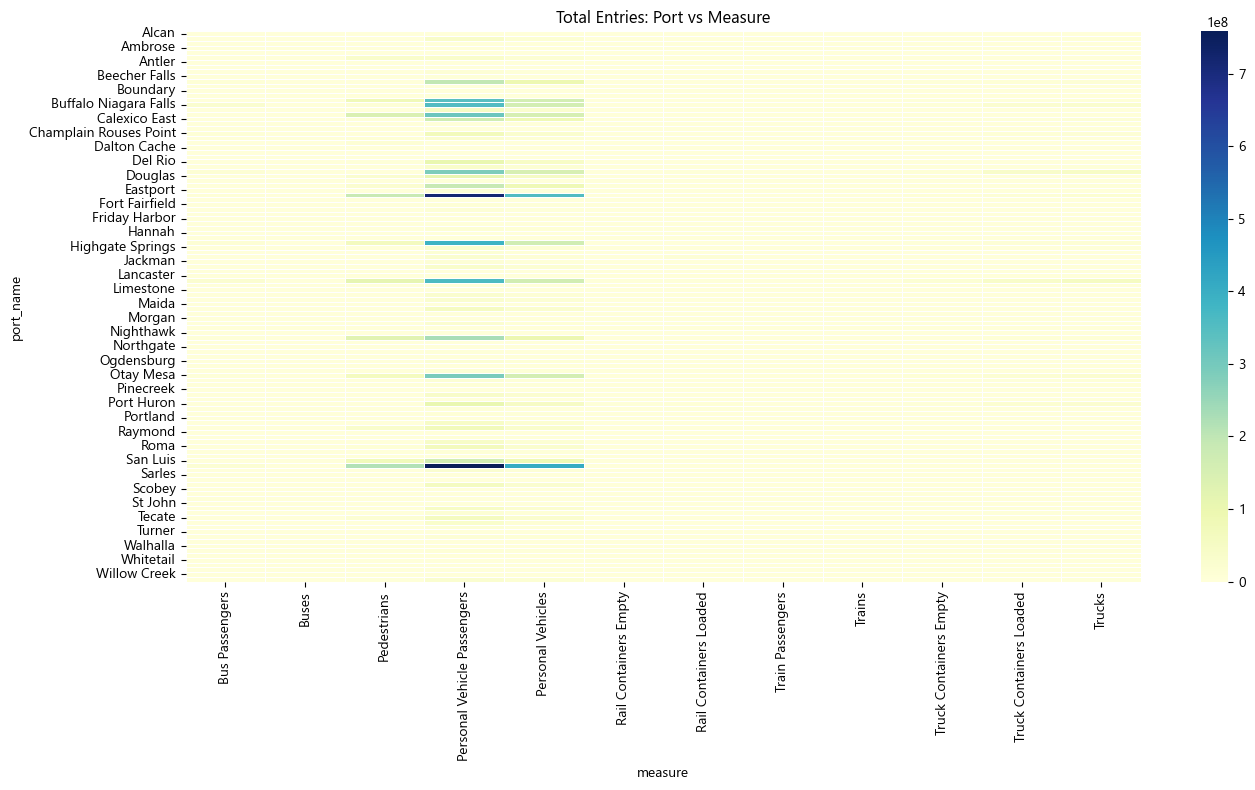

In [9]:

# Clean and prep
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date', 'value'])

# ========== 📌 Summary Stats ==========
print("=== Summary of Numeric Columns ===")
print(df.describe())

print("\n=== Unique Port Names ===")
print(df['port_name'].nunique())

print("\n=== Most Common Measures ===")
print(df['measure'].value_counts().head())

print("\n=== Most Common Ports ===")
print(df['port_name'].value_counts().head())

# ========== 📌 Grouped Aggregates ==========
print("\n=== Total Entries by Border ===")
print(df.groupby('border')['value'].sum())

print("\n=== Total Entries by Measure ===")
print(df.groupby('measure')['value'].sum().sort_values(ascending=False))

print("\n=== Monthly Total Entries ===")
monthly = df.groupby(df['date'].dt.to_period('M'))['value'].sum()
print(monthly)

# ========== 📈 Visualizations ==========
# Total entries by measure
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='measure', y='value', estimator=sum, errorbar=None,hue='measure', palette='coolwarm',legend=False)
plt.title('Total Entries by Measure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trend over time
df_monthly = df.groupby(df['date'].dt.to_period('M'))['value'].sum().reset_index()
df_monthly['date'] = df_monthly['date'].dt.to_timestamp()

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_monthly, x='date', y='value', marker='o')
plt.title('Monthly Border Crossings Over Time')
plt.xlabel('Date')
plt.ylabel('Total Crossings')
plt.grid(True)
plt.tight_layout()
plt.show()

# Heatmap: Port vs Measure
pivot_table = df.pivot_table(index='port_name', columns='measure', values='value', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5)
plt.title('Total Entries: Port vs Measure')
plt.tight_layout()
plt.show()


3- Trend Analysis Code

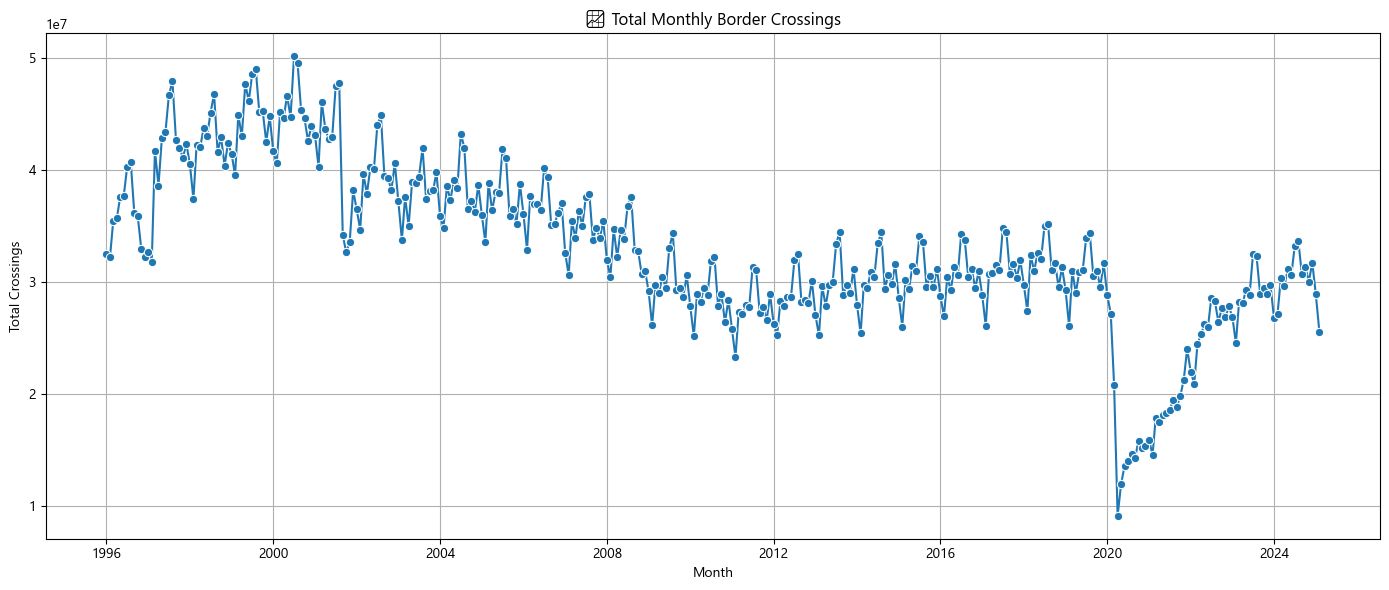

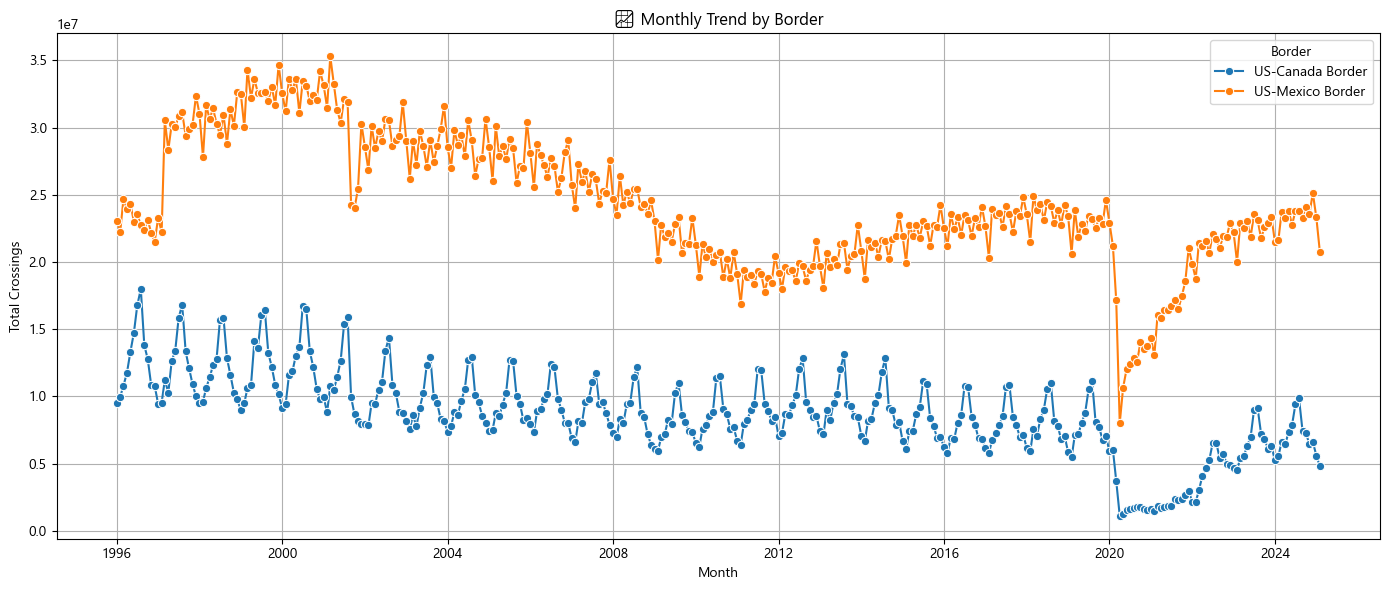

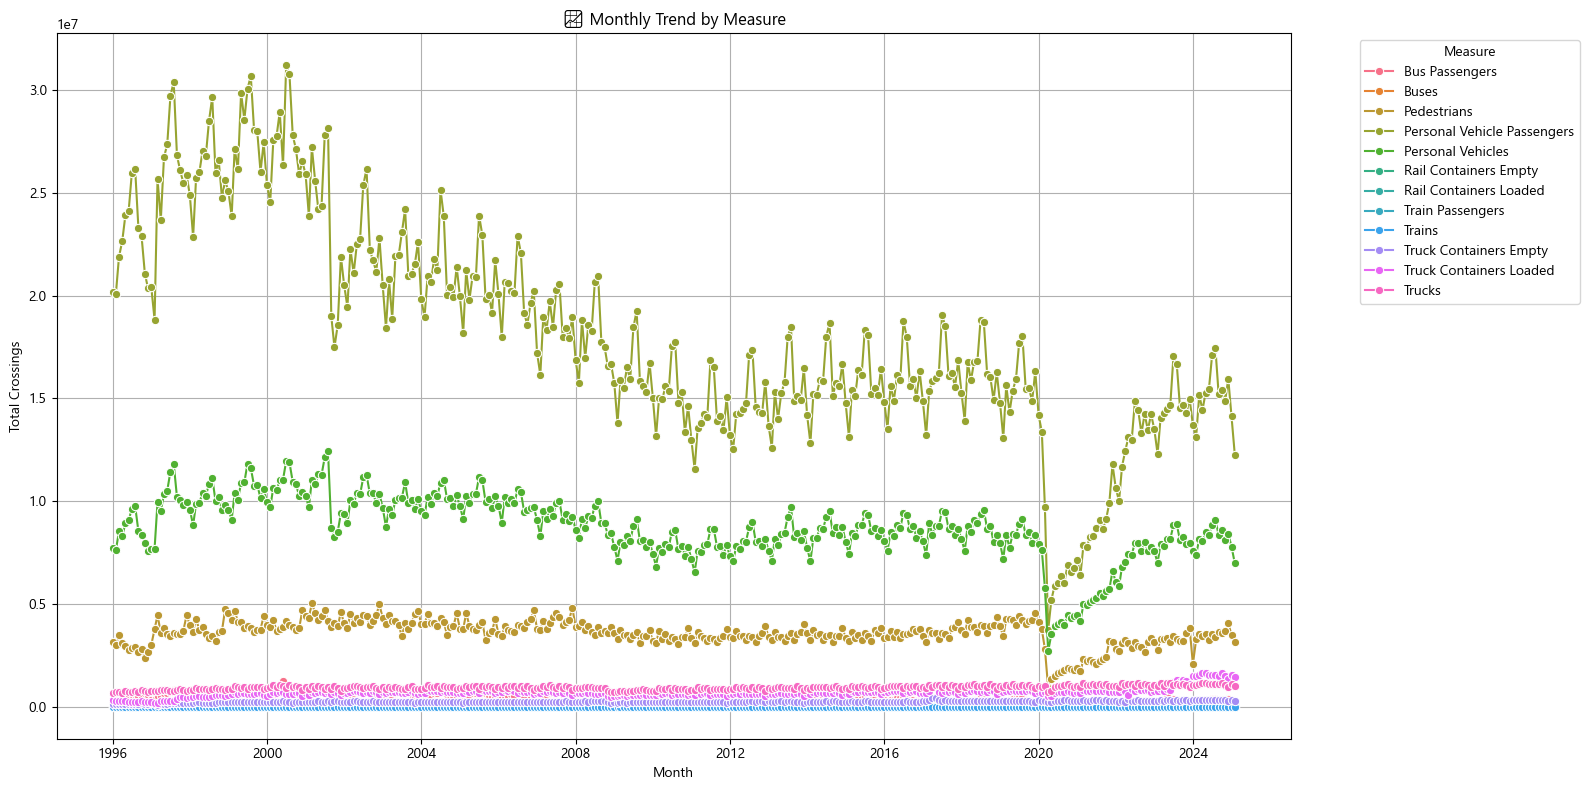

In [10]:
# Convert to monthly periods for grouping
df['month'] = df['date'].dt.to_period('M')

# =============================
# 🔹 1. Overall Monthly Trend
# =============================
monthly_total = df.groupby('month')['value'].sum().reset_index()
monthly_total['month'] = monthly_total['month'].dt.to_timestamp()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_total, x='month', y='value', marker='o')
plt.title('📈 Total Monthly Border Crossings')
plt.xlabel('Month')
plt.ylabel('Total Crossings')
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================
# 🔹 2. Monthly Trend by Border
# =============================
monthly_border = df.groupby(['month', 'border'])['value'].sum().reset_index()
monthly_border['month'] = monthly_border['month'].dt.to_timestamp()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_border, x='month', y='value', hue='border', marker='o')
plt.title('📈 Monthly Trend by Border')
plt.xlabel('Month')
plt.ylabel('Total Crossings')
plt.legend(title='Border')
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================
# 🔹 3. Monthly Trend by Measure (Optional)
# =============================
monthly_measure = df.groupby(['month', 'measure'])['value'].sum().reset_index()
monthly_measure['month'] = monthly_measure['month'].dt.to_timestamp()

plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_measure, x='month', y='value', hue='measure', marker='o')
plt.title('📈 Monthly Trend by Measure')
plt.xlabel('Month')
plt.ylabel('Total Crossings')
plt.legend(title='Measure', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

4- Geographical insights

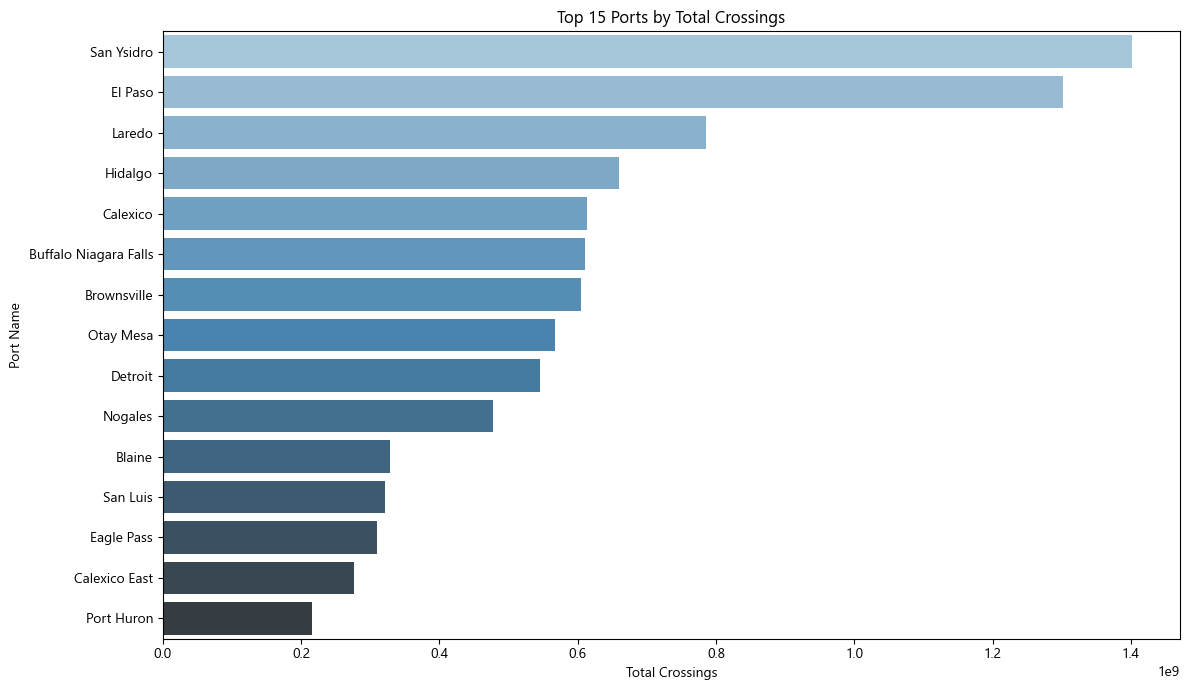

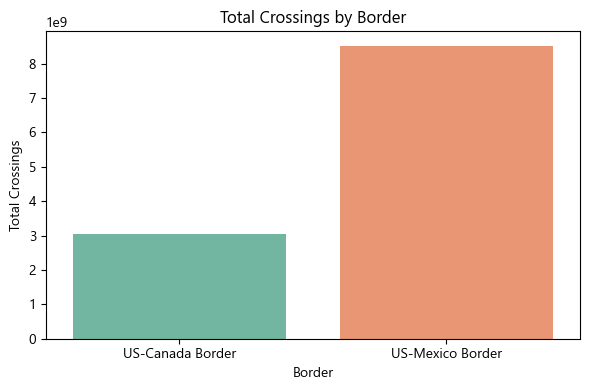

In [11]:
# 🔹 1. Total Crossings by Port
port_totals = df.groupby('port_name')['value'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 7))
sns.barplot(x=port_totals.values, y=port_totals.index,hue=port_totals.index, palette='Blues_d')
plt.title('Top 15 Ports by Total Crossings')
plt.xlabel('Total Crossings')
plt.ylabel('Port Name')
plt.tight_layout()
plt.show()

# ===========================
# 🔹 2. Total Crossings by Border
# ===========================
border_totals = df.groupby('border')['value'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=border_totals, x='border', y='value',hue='border', palette='Set2',legend=False)
plt.title('Total Crossings by Border')
plt.xlabel('Border')
plt.ylabel('Total Crossings')
plt.tight_layout()
plt.show()

5- Systamatics Scenario

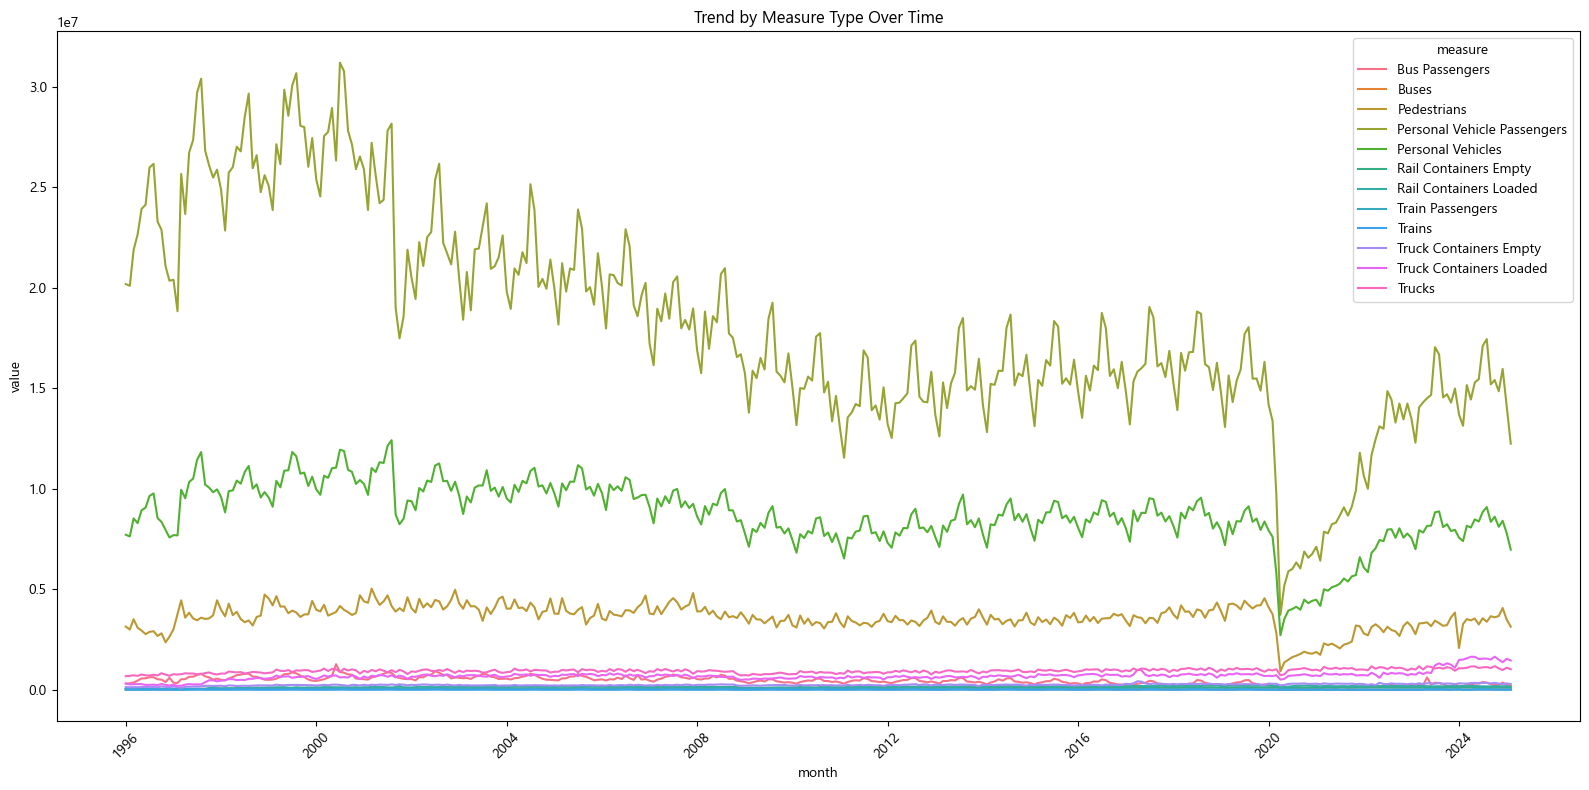


✅ Key Takeaways:
- Most common ports and busiest months
- Canada vs Mexico border traffic comparison
- Measures like Trucks and Personal Vehicles dominate crossings


In [12]:
# 📌 8. Measure-wise Analysis

measure_trend = df.groupby(['month', 'measure'])['value'].sum().reset_index()
measure_trend['month'] = measure_trend['month'].dt.to_timestamp()

plt.figure(figsize=(16, 8))
sns.lineplot(data=measure_trend, x='month', y='value', hue='measure')
plt.title('Trend by Measure Type Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ✅ 9. Key Takeaways (Prints Only)

print("\n✅ Key Takeaways:")
print("- Most common ports and busiest months")
print("- Canada vs Mexico border traffic comparison")
print("- Measures like Trucks and Personal Vehicles dominate crossings")